In [2]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
from pathlib import Path


def chooseFiles(symbol):  # Chaning directory path 
    
    '''
    
    chooseFiles() input the symbol you are working with and subsets the pump files using 
    the file of each instance. Returns a df of matching filenames and matching symbols
    To get a list of all files use: chooseFiles('btc')
    
    '''
    
    filelist = [] #pd.DataFrame()#[]
    symbol = symbol.upper()

    
    
    for child in Path('pumpSections/pumpSections-.5hr').iterdir():
        
        if child.is_file() and symbol in child.name: 

            filelist.append(child.name)
    

    df = pd.DataFrame({'files': filelist})
    symbol = df['files'].str.extract('([A-Z]+)')
    date = df['files'].str.extract('([0-9]+(-[0-9]+)+)').drop(1, axis=1)
    
    df['symbol'] = symbol
    df['date'] = date
    df.set_index('date', inplace=True)
    
            
            
    return df

#df = chooseFiles('btc')

In [4]:
def getFromFilenames():
    
    '''
    
    getFromFilenames() gathers all the filenames from within current directory, extracts information
    from the filename and returns a df of filename, time of pump, and symbol   
       
    '''
    
    filelist = []

    from pathlib import Path

    for child in Path('pumpSections/').iterdir():
        if child.is_file() and 'csv' in child.name:
#            print(child.name)
            filelist.append(child.name)
    

    filelist = pd.DataFrame(filelist, columns=['filename'])

    dates = pd.DataFrame(filelist['filename'].str.extract('([0-9]+(-[0-9]+)+)')).drop(1, axis=1)
    symbol = pd.DataFrame(filelist['filename'].str.extract('([A-Z]+)'))

    filelist['dates'] = dates
    filelist['symbol'] = symbol

    filelist['dates'] = pd.to_datetime(filelist['dates'].astype('str'), format="%Y-%m-%d-%H")
    
    return filelist

filelist = getFromFilenames()
filelist.head()

,filename,dates,symbol
0,pump_klines_SNMBTC_2019-08-7-17.csv,2019-08-07 17:00:00,SNMBTC
1,pump_trades_VIBBTC_2020-07-30-18.csv,2020-07-30 18:00:00,VIBBTC
2,pump_klines_CDTBTC_2019-08-9-14.csv,2019-08-09 14:00:00,CDTBTC
3,pump_klines_GXSBTC_2019-02-10-17.csv,2019-02-10 17:00:00,GXSBTC
4,pump_trades_SNGLSBTC_2020-03-8-18.csv,2020-03-08 18:00:00,SNGLSBTC


In [5]:

def extractData(filelist,hours):
    
    try:
        os.mkdir('pumpSections/pumpSections-.5hr')

        os.mkdir('pumpSections/pumpSections-1hr')

        
    except: pass

    for row in filelist.iterrows():
        
        filename = row[1][0]
        
        file = pd.read_csv('pumpSections/'+ filename, index_col='time')
        file.index = pd.to_datetime(file.index)#getProperDF(row[1][0]) # 'pump_trades_PPTBTC_2019-05-31-14.zip')#
        if file is None: continue
            
        filename = str.replace(row[1][0], 'zip', 'csv')#(newFilename.repalce('zip', 'csv')

        startDate = pd.to_datetime(row[1][1] + timedelta(hours=hours))
        endDate = pd.to_datetime(row[1][1] - timedelta(hours=hours))
        
        pumpSection = file.loc[endDate:startDate]
    
#        pumpSection.to_csv('pumpSections/pumpSections-.5hr/' + filename)
#        print(filename, ' saved')
        from time import sleep
#        sleep(1)
        
    print('All files extracted to pumpSections-.5hr/')
    print(filelist)


        
#filelist = extractData(filelist, .5)

In [6]:
# Of 400 pumps there are only 70 unique, with some coins pumped up to 20 times
# the times of pumps for single coins would be intersting to look at

#df['symbol'].value_counts().sort_values(ascending=False).head()

# Confirming that each file has its trade/kline pair
(filelist.filename.str.contains('trade') == True).value_counts()

False    200
True     200
Name: filename, dtype: int64

In [7]:
coinFiles = chooseFiles('gxsBTC')
coinFiles.sort_values('date', inplace=True)
coinFiles.head()


,files,symbol
date,,
2019-01-20-17,pump_trades_GXSBTC_2019-01-20-17.csv,GXSBTC
2019-01-20-17,pump_klines_GXSBTC_2019-01-20-17.csv,GXSBTC
2019-01-20-18,pump_klines_GXSBTC_2019-01-20-18.csv,GXSBTC
2019-01-20-18,pump_trades_GXSBTC_2019-01-20-18.csv,GXSBTC
2019-02-10-17,pump_klines_GXSBTC_2019-02-10-17.csv,GXSBTC


In [8]:
from random import choice

# filelist, trades or kline, how many
# Pull some random records from our filelist.
# Input is Filelist, kind of file ('trade', or 'kline'), and the number of records you want

def randomRecords(filelist, kind, number):
    rand = pd.DataFrame()
    print(number)

    for i in range(number):
        coin = chooseFiles(choice(filelist.symbol))#chooseFiles('gxsbtc')
        mask = coin.files.str.contains(kind)
        tradeCoin = coin.loc[mask]

        coin = tradeCoin.iloc[0]
        rand = rand.append(coin)
    return rand


rand = randomRecords(filelist,'trade',5)

5


2
9439


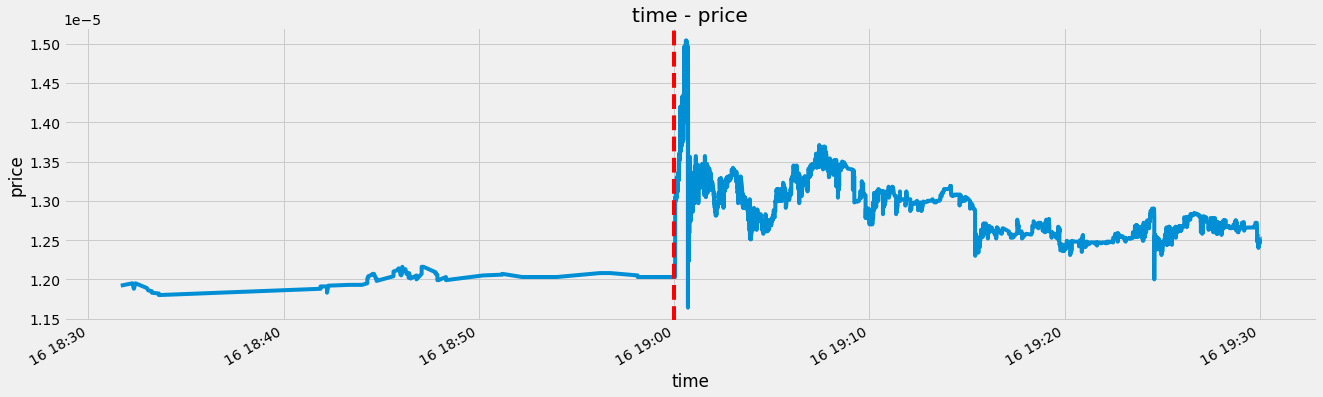

5072


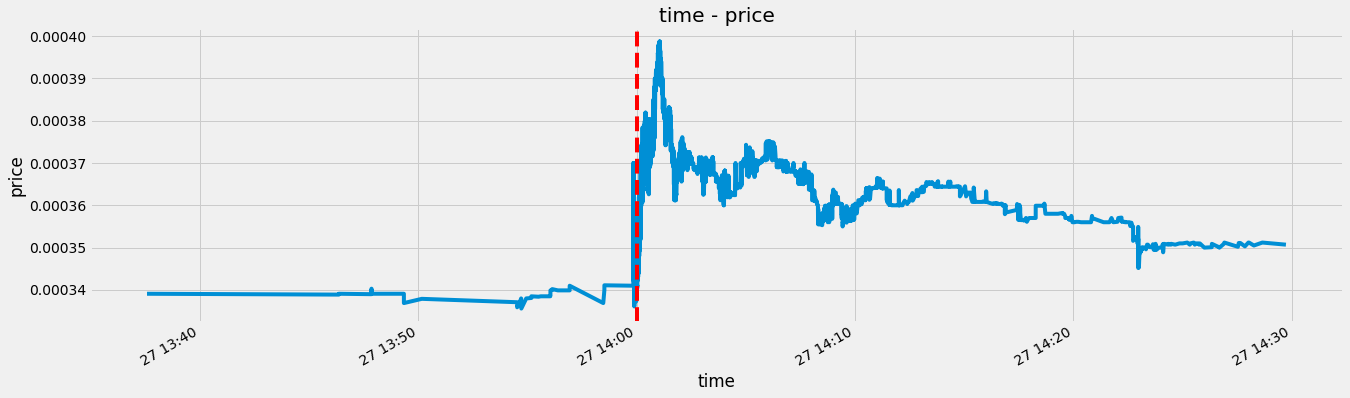

3
6669


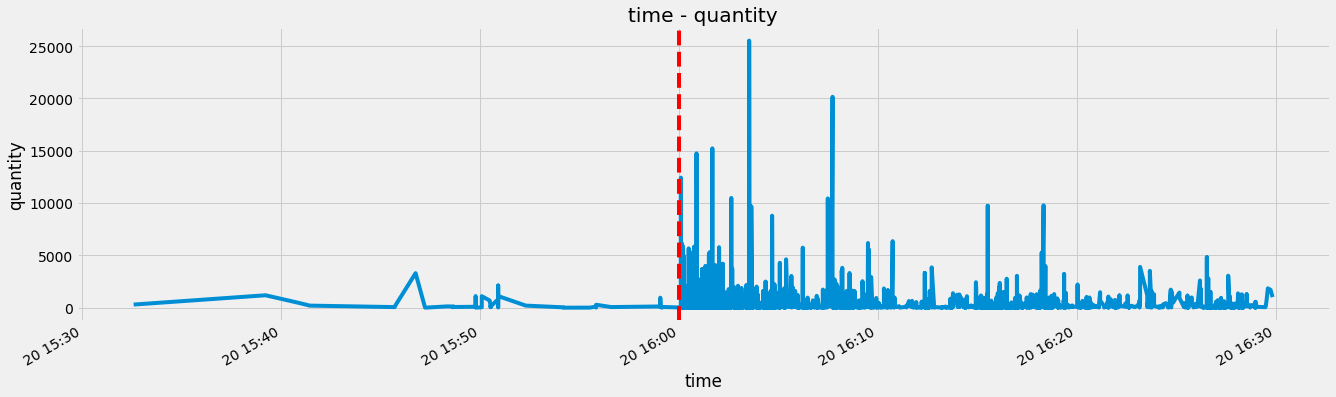

2199


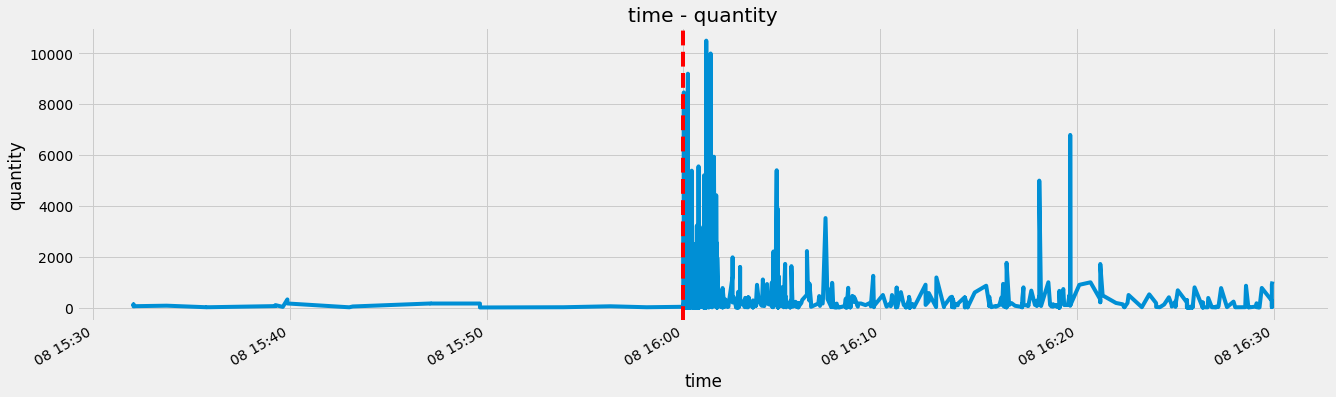

137


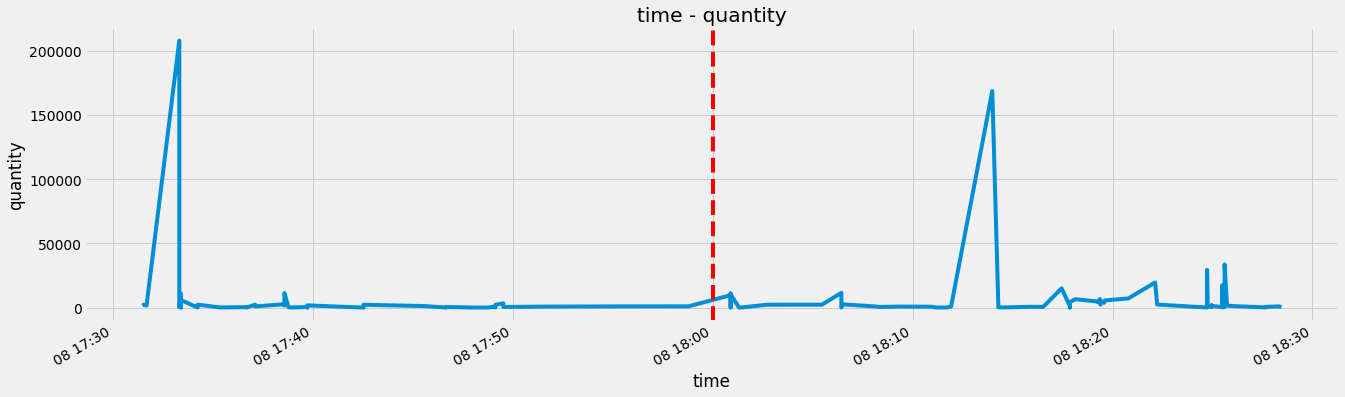

3
137


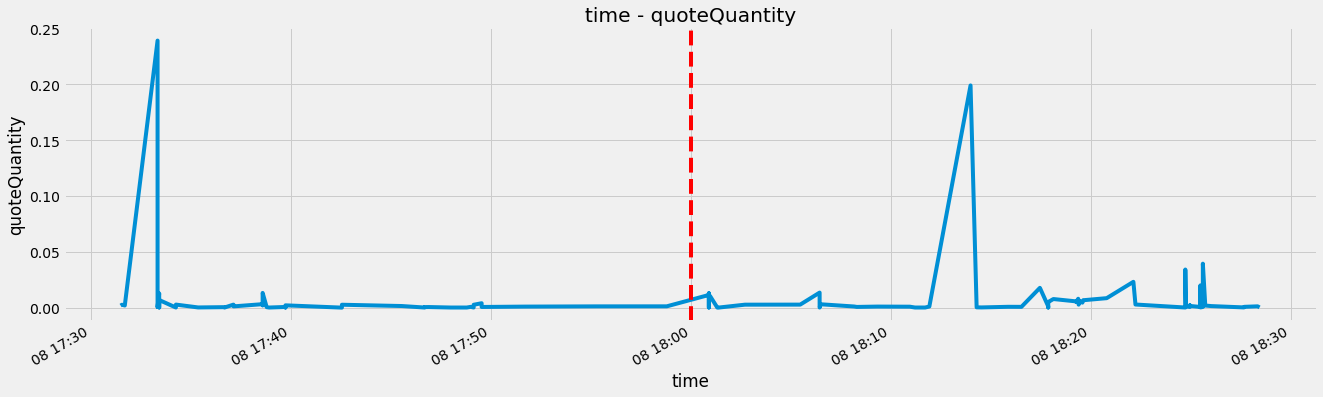

2855


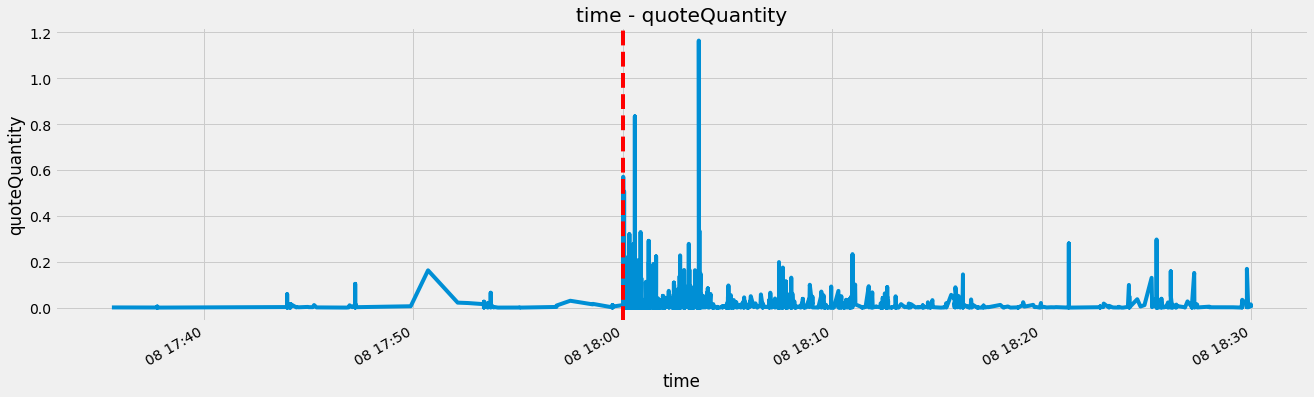

8655


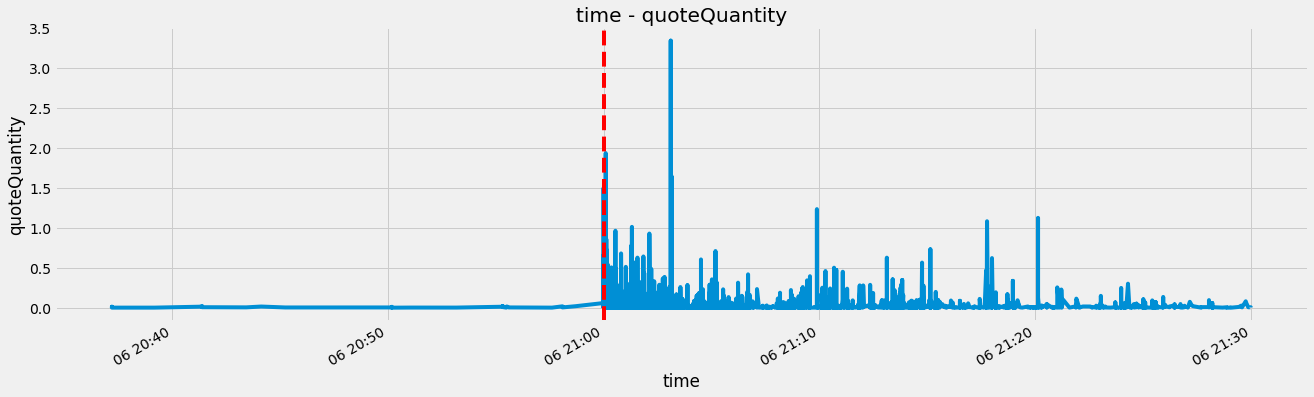

In [9]:
# get df from random records to go through one by one and make plots
# could also generate the rand inside function

# kline or trade, the target col, number of graphs, labels

def graphPumps(kind, target, number, xlabel, ylabel):
    
    rand = randomRecords(filelist,kind,number)

    for i in range(number):
        randFile = rand.iloc[i]
    
        sub = pd.read_csv('pumpSections/pumpSections-.5hr/' + randFile.files).set_index('time')
        sub.index = pd.to_datetime(sub.index)
        time = pd.to_datetime(pd.DataFrame(rand.iloc[i]).columns)
        print(len(sub))
    
        plt.style.use('fivethirtyeight')
        plt.figure(figsize=(20,6))

        ax = sub[target].plot()
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(xlabel + ' - ' + ylabel)#'Pump Time')
        ax.axvline(x=time.astype('str'), color='red', linestyle='--')
        plt.show()


graphPumps('trade', 'price', 2, 'time', 'price') 
graphPumps('trade', 'quantity', 3, 'time', 'quantity') 
graphPumps('trade', 'quoteQuantity', 3, 'time', 'quoteQuantity') 


# subsetting to 5 mins before and 20 mins after
# sub = kline['2018-08-21 15:55:00':'2018-08-21 16:25']


In [10]:
# Get klines and trade for a particular day, or pair?


def getPumpDayFiles():
    pass
    
    

In [11]:
# THIS FILE IS IN THE TOP LEVEL FOLDER 


# Klines provide aggerate numbers in intervals of 1 minute. This will be suitable for initial exploration

trade = pd.read_csv('pumpSections/pumpSections-5min/pump_trades_RDNBTC_2018-08-21-16.csv').set_index('time')
kline = pd.read_csv('pumpSections/pumpSections-.5hr/pump_klines_RDNBTC_2018-08-21-16.csv').set_index('time')

trade1 = pd.read_csv('pumpSections/pumpSections-.5hr/pump_trades_AMBBTC_2019-01-1-14.csv').set_index('time')
trade2 = pd.read_csv('pumpSections/pumpSections-.5hr/pump_trades_POABTC_2019-05-26-21.csv').set_index('time')

kline.sample(3)

,open,high,low,close,volume,closeTime,quoteAssetVolume,numberOfTrades,takerBuyBaseAssetVolume,takerBuyQuoteAssetVolume,ignore,symbol
time,,,,,,,,,,,,
2018-08-21 16:17:00,0.000050,0.000050,0.000050,0.000050,76.0,2018-08-21 16:17:59.999,0.003820,2,76.0,0.003820,0,RDNBTC
2018-08-21 16:25:00,0.000049,0.000049,0.000049,0.000049,447.0,2018-08-21 16:25:59.999,0.021967,5,100.0,0.004914,0,RDNBTC
2018-08-21 15:52:00,0.000049,0.000049,0.000049,0.000049,0.0,2018-08-21 15:52:59.999,0.000000,0,0.0,0.000000,0,RDNBTC


In [12]:
trade1.describe()

,tradeID,price,quantity,quoteQuantity
count,2.509000e+03,2.509000e+03,2509.000000,2509.000000
mean,3.280946e+06,1.873021e-05,806.171383,0.015187
std,7.244302e+02,5.711252e-07,2541.384872,0.047762
min,3.279692e+06,1.752000e-05,1.000000,0.000018
25%,3.280319e+06,1.825000e-05,63.000000,0.001190
50%,3.280946e+06,1.859000e-05,183.000000,0.003469
75%,3.281573e+06,1.919000e-05,606.000000,0.011430
max,3.282200e+06,2.010000e-05,53227.000000,0.971393


In [ ]:
# would like to use the price from first in the time window to the high, pct_change on those
trade.describe()

In [ ]:
corr = trade.corr()
sns.heatmap(corr)

In [ ]:
#sec = sub.resample('S').agg({'price':'sum', 'quantity':'sum'})#,'tradeID':'nunique'})

In [ ]:
from statsmodels.graphics import tsaplots

fig = tsaplots.plot_acf(kline['open'], lags=6)

In [1]:
sub.price.plot()

NameError: name 'sub' is not defined

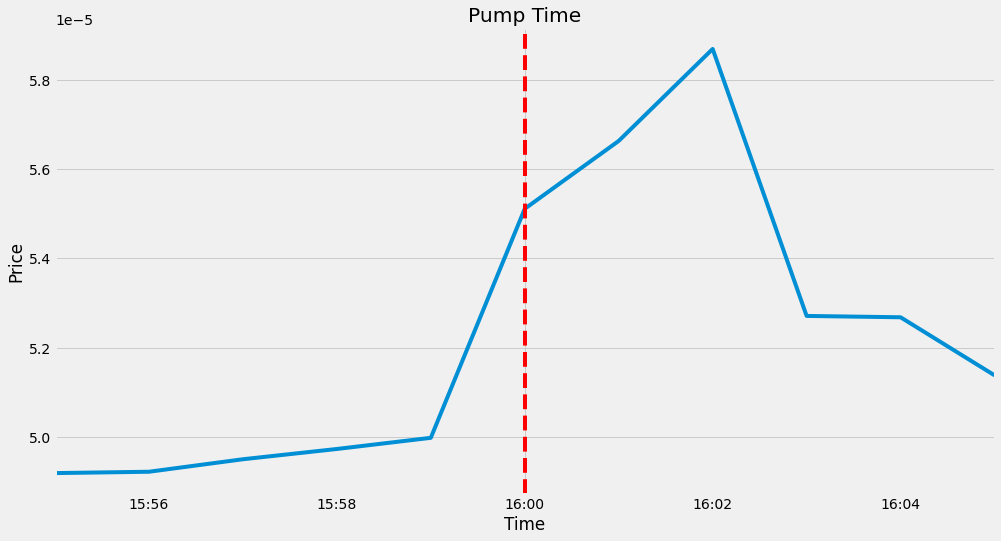

In [99]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))

# subsetting to 5 mins before and 20 mins after
sub = kline['2018-08-21 15:55:00':'2018-08-21 16:25']
sub.index = pd.to_datetime(sub.index)
#kline1 = kline[]

ax = sub['open'].plot()
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.set_title('Pump Time')
#ax.axvline(x=pd.to_datetime('2019-05-26 21:00:59.613'), color='red')
ax.axvline(x='2018-08-21 16:00', color='red', linestyle='--')
plt.show()



pandas.core.indexes.base.Index

<AxesSubplot:xlabel='time', ylabel='price'>

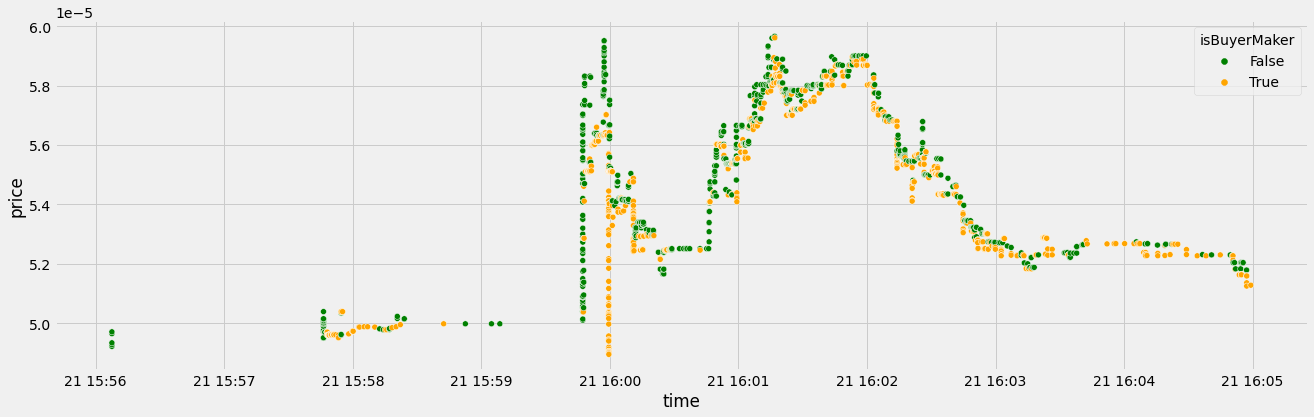

In [123]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,6))

kline.index = pd.to_datetime(kline.index)
k3 = kline.resample('3T').asfreq()
#plt.plot(k3['open'])

trade.index = pd.to_datetime(trade.index)

sns.scatterplot(data=trade, x ='time', y='price', hue='isBuyerMaker', palette=['green','orange'])


<AxesSubplot:xlabel='time'>

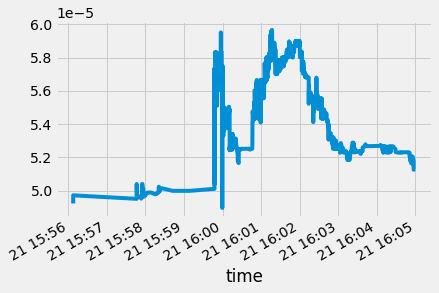

In [122]:
trade.price.plot()